In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Text(0.5, 0.98, 'some_faces')

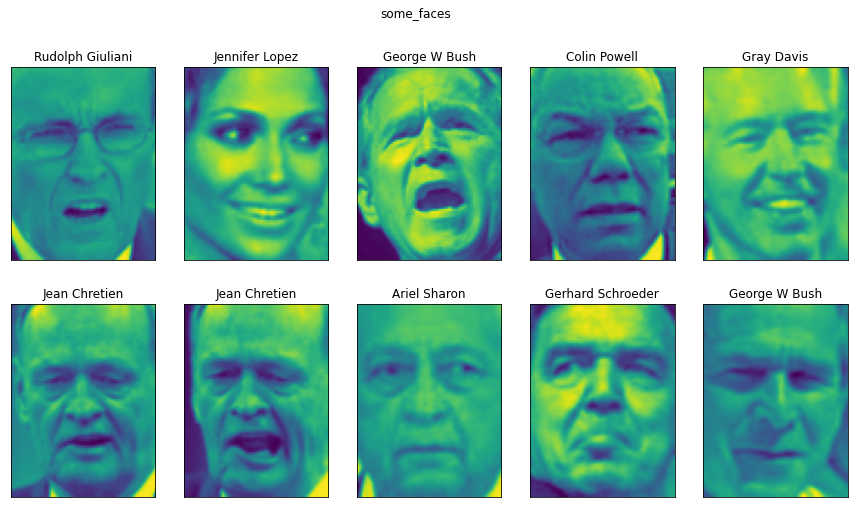

In [2]:
# Importamos el dataset de las fotos
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [3]:
print('(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):')
print(people.images.shape)
print('Número de personas a las que pertenecen las fotos:')
print(len(people.target_names))

(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):
(2559, 87, 65)
Número de personas a las que pertenecen las fotos:
46
